In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prefix = 'plot'
tuneby = 'year'

df = pd.read_csv('results/bootstrap_ml_pred_' + prefix + '_cv_year_tuneby_' + tuneby + '.csv')

In [3]:
df

,Model,numb_yrs,yr_train,yr_test,MAE_kg,MAPE,MAE_pct,R2,r2_coef
0,LASSO,2,[2014 2015],2013,284.449242,0.471934,0.404792,-0.043,0.237
1,PLS,2,[2014 2015],2013,269.636225,0.431923,0.383712,0.071,0.282
2,PCR,2,[2014 2015],2013,225.746673,0.359082,0.321254,0.272,0.366
3,SVR,2,[2014 2015],2013,409.679870,0.686273,0.583005,-0.644,0.195
4,RF,2,[2014 2015],2013,266.316878,0.472012,0.378989,-0.095,0.168
...,...,...,...,...,...,...,...,...,...
30115,PLS,9,[2013 2014 2015 2016 2017 2018 2019 2020 2021],2022,186.594254,0.373300,0.319326,0.195,0.291
30116,PCR,9,[2013 2014 2015 2016 2017 2018 2019 2020 2021],2022,188.847831,0.387086,0.323183,0.185,0.273
30117,SVR,9,[2013 2014 2015 2016 2017 2018 2019 2020 2021],2022,179.824268,0.369311,0.307741,0.275,0.348
30118,RF,9,[2013 2014 2015 2016 2017 2018 2019 2020 2021],2022,204.790709,0.425135,0.350467,0.050,0.212


In [4]:
#df['numb_yrs'] = pd.Categorical(df['numb_yrs'].astype(str), np.sort(df['numb_yrs'].astype(str).unique()))

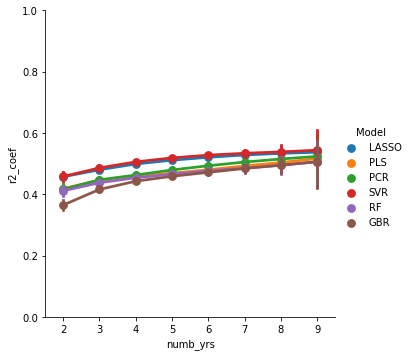

In [5]:
g = sns.catplot(kind='point', x='numb_yrs', y='r2_coef', hue='Model', data=df)
g.set(ylim=(0, 1.0))

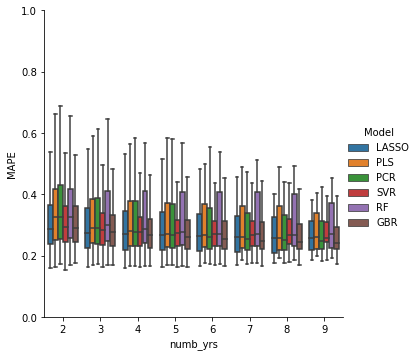

In [7]:
g = sns.catplot(kind='box', x='numb_yrs', y='MAPE', hue='Model', data=df, showfliers=False)
g.set(ylim=(0, 1.0))

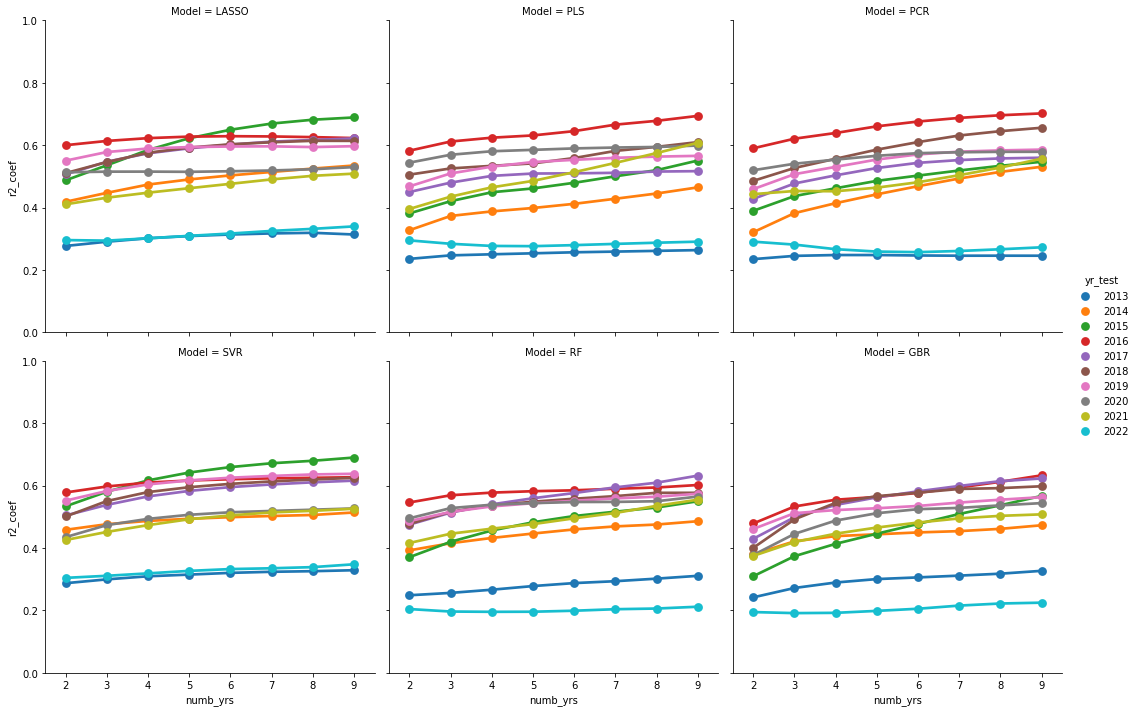

In [8]:
g = sns.catplot(kind='point', x='numb_yrs', y='r2_coef', 
                col='Model', col_wrap=3, hue='yr_test', errorbar=None,
                data=df[df['numb_yrs'] > 1])
g.set(ylim=(0.0, 1.0))

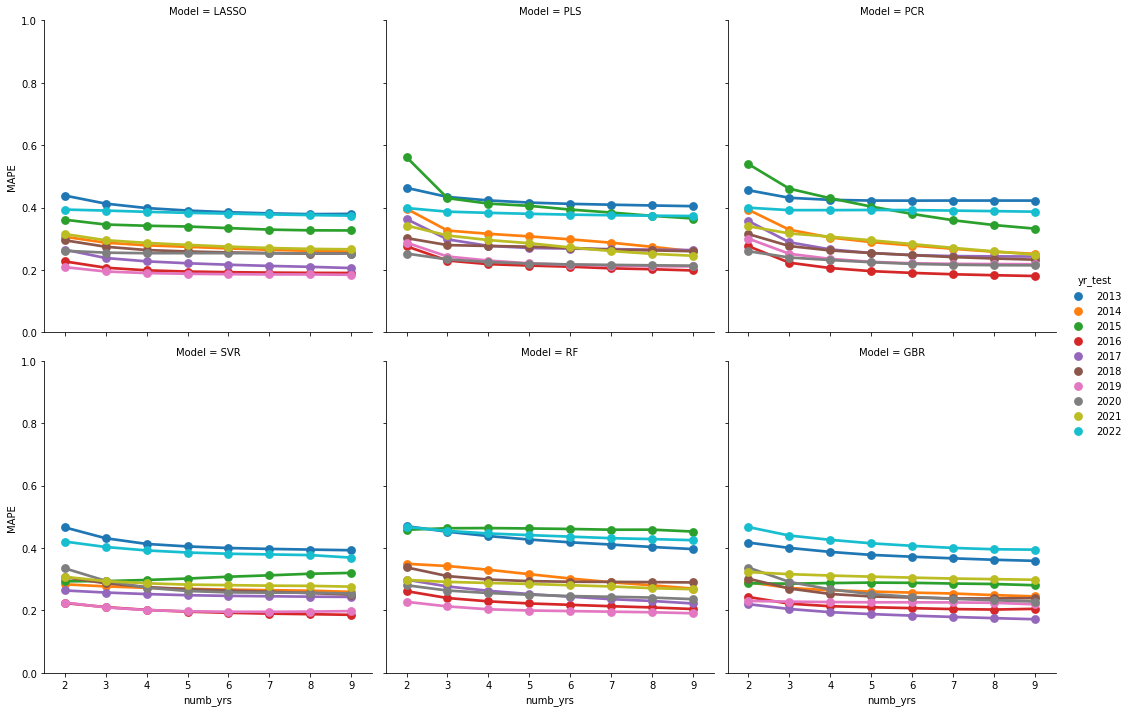

In [9]:
g = sns.catplot(kind='point', x='numb_yrs', y='MAPE', 
                col='Model', col_wrap=3, hue='yr_test', errorbar=None,
                data=df[df['numb_yrs'] > 1])
g.set(ylim=(0.0, 1.0))

In [45]:
df[(df['yr_test'] == 2022) & (df['Model'] == 'LASSO') & (df['numb_yrs'] == 4)]

,Model,numb_yrs,yr_train,yr_test,MAE_kg,MAPE,MAE_pct,R2,r2_coef,train_2022,train_2019
7914,LASSO,4,[2013 2014 2015 2016],2022,511.186345,0.485515,0.527373,-1.826,0.006,False,False
8064,LASSO,4,[2013 2014 2015 2017],2022,491.881732,0.467998,0.509138,-1.722,0.008,False,False
8184,LASSO,4,[2013 2014 2015 2018],2022,458.478143,0.449699,0.485647,-1.357,0.001,False,False
8274,LASSO,4,[2013 2014 2015 2019],2022,433.225918,0.375880,0.430879,-0.859,0.020,False,True
8334,LASSO,4,[2013 2014 2015 2020],2022,330.185631,0.305469,0.340641,-0.557,0.007,False,False
...,...,...,...,...,...,...,...,...,...,...,...
15174,LASSO,4,[2017 2018 2019 2020],2022,321.836136,0.354930,0.322962,-0.004,0.008,False,True
15204,LASSO,4,[2017 2018 2019 2021],2022,328.254164,0.418838,0.342756,0.040,0.075,False,True
15234,LASSO,4,[2017 2018 2020 2021],2022,349.049490,0.419807,0.350270,-0.059,0.000,False,False
15264,LASSO,4,[2017 2019 2020 2021],2022,343.611822,0.458302,0.362898,0.021,0.043,False,True


In [ ]:
df['train_2022'] = df['yr_train'].apply(lambda x: '2022' in x)
df['train_2019'] = df['yr_train'].apply(lambda x: '2019' in x)

In [ ]:
g = sns.catplot(kind='point', x='numb_yrs', y='MAE_pct', 
                col='Model', col_wrap=3, hue='yr_test',
                data=df[~df['train_2022'] & ~df['train_2019']])
g.set(ylim=(0, 1.0))

In [ ]:
g = sns.catplot(kind='point', x='numb_yrs', y='MAE_pct', 
                col='Model', col_wrap=3, data=df,# showfliers=False, 
                hue='train_2022')
g.set(ylim=(0, 1.0))

In [ ]:
df[(df['yr_test'] == 2021) &
 (df['numb_yrs'] == 7) & ~df['train_2022']].sort_values('MAE_pct')